In [3]:
%matplotlib inline 
#widget
import sys 
import xarray as xr
import numpy as np
import os 
import warnings
import yaml
from random import randint
import math
from datetime import datetime, timedelta

sys.path.append('/home/jvalenti/MOAD/analysis-jose/Source')
from OP_functions import *

In [4]:
config = ['/home/jvalenti/scratch/OParcels_runs/Parcels_outfall/outfall_runs.yaml']
path_runs = '/home/jvalenti/MOAD/results/Graham/' 
paths = path(0)
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

path_NEMO = make_prefix(datetime(2019, 1, 1),paths['NEMO'])

jjii = xr.open_dataset('~/MOAD/grid/grid_from_lat_lon_mask999.nc')
finder(jjii,48,-123)

(193, 200)

In [5]:
coords = xr.open_dataset('/home/jvalenti/MOAD/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset('/home/jvalenti/MOAD/grid2/mesh_mask202108_TDV.nc')

Text(0.5, 1.0, 'Salish Sea subregions')

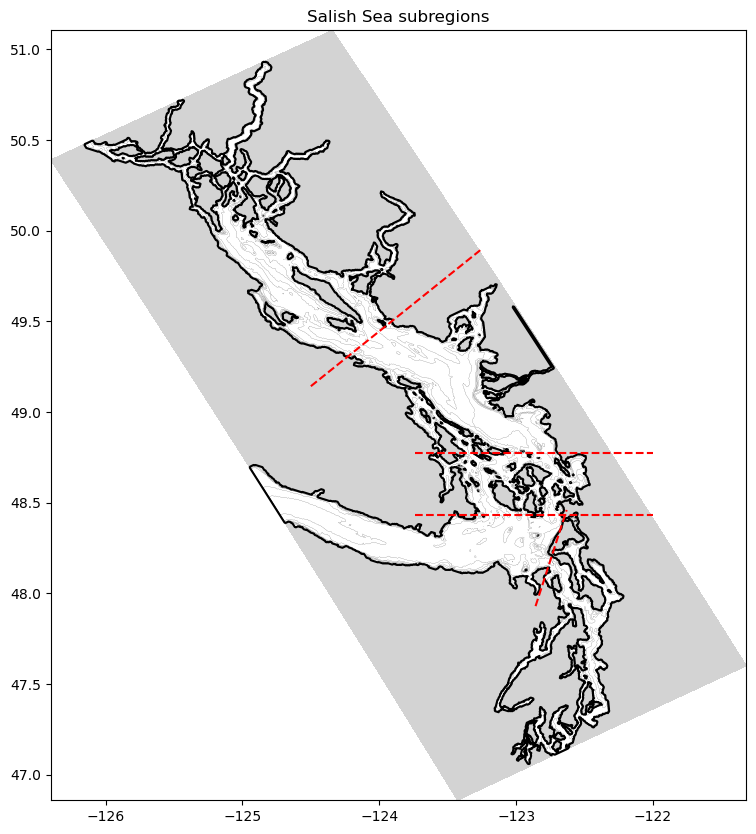

In [6]:
from matplotlib import pyplot as plt, animation, rc,colors
import cmocean
cm = cmocean.cm.dense

fig, ax = plt.subplots(1,1,figsize=(10, 10))

ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
#aa = ax.hist2d(DS.lon,DS.lat,100,cmap =cm,vmin=1e-5,vmax=2000)
ax.set_aspect(1/np.sin(np.deg2rad(49)))
Xline = np.linspace(-124.5,-122,100)
yline0 = (7/3)*Xline+334.6
yline1 = (20/33)*Xline+124.597
yline2 = np.zeros_like(Xline)+48.43
yline3 = np.zeros_like(Xline)+48.774
plt.plot(Xline[65:75],yline0[65:75],'r--')
plt.plot(Xline[:50],yline1[:50],'r--')
plt.plot(Xline[30:],yline2[30:],'r--')
plt.plot(Xline[30:],yline3[30:],'r--')

plt.title('Salish Sea subregions')

In [7]:
def counting(DS,month,axs,fact=1):
    DSb = DS[DS.status==2]
    DSe = DS[DS.status==3]
    DSs = DS[DS.status==1]
    count = []
    countb = []
    counte = []
    depthb = []
    for i in range(ds.dims['obs']-1):
        times= np.min(DS.time)+i*6*3600
        count.append(len(DSs[DSs.time == times]))
        counte.append(len(DSe[DSe.time == times]))
        countb.append(len(DSb[DSb.time == times]))
        depthb.append(np.mean(DSs[DSs.time == times].z*DSs[DSs.time == times].fact))
    axs[0,0].plot(x2,np.array(count)/fact,label = month)
    axs[1,0].plot(x2,np.array(countb)/fact,'--',label = 'Beached')
    twin3.plot(x2,np.array(counte)/fact,label = ' Sedimented')
    axs[1,0].set_ylim([-1e4,6e4])
    twin3.set_ylim([-1e4,6e4])
    beached = [(c - countb[i-1])*4/(count[i-1]) for i,c in enumerate(countb)]#*4 to give the units in day-1
    sediment = [(c - counte[i-1])*4/(count[i-1]) for i,c in enumerate(counte)]
    beached = np.array(beached)
    for i,b in enumerate(beached):
        if b==0:
            beached[i]=(beached[i-1]+beached[i+1])/2
    sediment = np.array(sediment)
    for i,b in enumerate(sediment):
        if b==0:
            sediment[i]=(sediment[i-1]+sediment[i+1])/2
    axs[0,1].plot(moving_average(x2[1:],10),moving_average(1/beached[1:],10),'-',label = 'Beaching rate')
    # twin1.plot(x2,depthb,'--',la(bel = 'Avg Depth')
    axs[1,1].plot(moving_average(x[1:],10),moving_average(1/sediment[1:],10),label = 'Sedimentation rate')
    return #count,counte,countb,beached,sediment

In [8]:
import pandas as pd
Point_At = pd.read_csv('Book1.csv')
Time=np.linspace(0,365,8017)

Source = pd.read_csv('Outfall_deploy.csv')
Source = Source.rename(columns={'Lat': 'lat', 'Lon': 'lon'})

In [9]:
runs = {'250 s':['alpha120190101.nc',2],'500 s':['alpha_1_jan.nc',2],'1,000 s':['alpha220190101.nc',2],'2,500 s':['Runs_alpha0220190101_.nc',1],'5,000 s':['Run_Enero20190101_.nc',2],'10,000 s':['Runs_alpha0520190101_.nc',1],'50,000 s':['Runs_alpha0120190101_.nc',1]}

months = {'Jan':['Run_Enero20190101_.nc',1],'Feb':['Run_Febrero20190201_.nc',32],'Mar':['Run_Marzo20190301_.nc',61],'Jun':['Run_Junio20190601_.nc',152],'Jul':['Run_Julio20190701_.nc',183],'Aug':['Run_Agosto20190801_.nc',214]}

sub_areas=['Puget','JdF','Haro2','NSoG','CSSoG']
def cutting(data,area):
    if area=='Puget':
        data_new = data.loc[(data['lat']<48.43) & (data['lat']<(7/3)*data['lon']+334.6)]
    elif area=='JdF':
        data_new = pd.concat([data.loc[((data['lat']<48.43) & (data['lat']>(7/3)*data['lon']+334.6))],data.loc[((data['lat']>48.43) & (data['lat']<48.774) & (data['lon']<-124))]])
    elif area=='Haro':  
        data_new = data.loc[(data['lat']>48.43) & (data['lat']<48.774) & (data['lon']>-123.456) & (data['lon']<-123)]
    elif area=='Haro2':  
        data_new = data.loc[(data['lat']>48.43) & (data['lat']<48.774) & (data['lon']>-124)]
    elif area=='NSoG':
        data_new = data.loc[(data['lat']>(20/33)*data['lon']+124.597)]
    elif area=='CSSoG': 
        data_new = data.loc[(data['lat']>48.774)&(data['lat']<(20/33)*data['lon']+124.597)]
    else:
        print('Unrecognized subarea') 
        data_new = data
    return data_new

In [10]:
area = mask.e1t*mask.e2t
puget_area = area.where((coords.nav_lat<48.43) & (coords.nav_lat<(7/3)*coords.nav_lon+334.6)).sum()
haro2_area= area.where((coords.nav_lat>48.43) & (coords.nav_lat<48.774) & (coords.nav_lon>-124)).sum()
NSoG_area = area.where((coords.nav_lat>(20/33)*coords.nav_lon+124.597)).sum()
CSSog_area = area.where((coords.nav_lat>48.774)&(coords.nav_lat<(20/33)*coords.nav_lon+124.597)).sum()
jdf_area = area.where((coords.nav_lat<48.43) & (coords.nav_lat>(7/3)*coords.nav_lon+334.6)).sum() + area.where(((coords.nav_lat>48.43) & (coords.nav_lat<48.774) & (coords.nav_lon<-124))).sum()

#puget2_area = area.where((coords.nav_lat<48.43) & (coords.nav_lat<(7/3)*coords.nav_lon+334.6)&(coords.nav_lon> -122.766)).sum() #To trim Main Channel

sub_areas_area={'Puget':puget_area,'JdF':jdf_area,'Haro2':haro2_area,'NSoG':NSoG_area,'CSSoG':CSSog_area}


In [11]:
puget_vol = mask.volume.where((coords.nav_lat<48.43) & (coords.nav_lat<(7/3)*coords.nav_lon+334.6)).sum()
haro2_vol= mask.volume.where((coords.nav_lat>48.43) & (coords.nav_lat<48.774) & (coords.nav_lon>-124)).sum()
NSoG_vol = mask.volume.where((coords.nav_lat>(20/33)*coords.nav_lon+124.597)).sum()
CSSog_vol = mask.volume.where((coords.nav_lat>48.774)&(coords.nav_lat<(20/33)*coords.nav_lon+124.597)).sum()
jdf_vol = mask.volume.where((coords.nav_lat<48.43) & (coords.nav_lat>(7/3)*coords.nav_lon+334.6)).sum() + mask.volume.where(((coords.nav_lat>48.43) & (coords.nav_lat<48.774) & (coords.nav_lon<-124))).sum()

#puget2_vol = mask.volume.where((coords.nav_lat<48.43) & (coords.nav_lat<(7/3)*coords.nav_lon+334.6)&(coords.nav_lon> -122.766)).sum() #To trim Main Channel

sub_areas_vol={'Puget':puget_vol,'JdF':jdf_vol,'Haro2':haro2_vol,'NSoG':NSoG_vol,'CSSoG':CSSog_vol}

In [15]:
means = []
vol = mask.e1t*mask.e2t
vol = vol.sum()
for alpha in runs:
    ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    DS = DS[DS.status==3]
    DSn = DS
    count = []
    timer = []
    for i in range(ds.dims['obs']-1):
        times= np.min(DSn.time)+i*6*3600
        timer.append(times)
        count.append(len(DSn[DSn.time == times]))
    conc= np.array(count)*1e7*13.7/(vol.item()*runs[alpha][1])
    means.append(np.mean(conc[-20:]))

In [16]:
means_month = []
vol = mask.e1t*mask.e2t
vol = vol.sum()
for alpha in months:
    ds = xr.open_dataset(path_runs+months[alpha][0], decode_times=False)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    DS = DS[DS.status==3]
    DSn = DS
    count = []
    timer = []
    for i in range(ds.dims['obs']-1):
        times= np.min(DSn.time)+i*6*3600
        timer.append(times)
        count.append(len(DSn[DSn.time == times]))
    conc= np.array(count)*1e7*13.7/(vol.item()*runs['5,000 s'][1])
    means_month.append(np.mean(conc[-20:]))

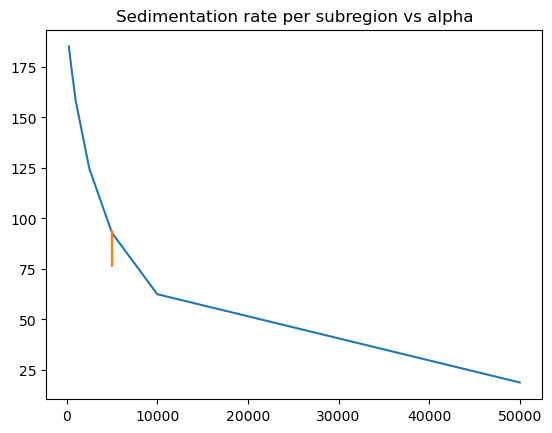

In [19]:
alphs = {'250 s':250,'500 s':500,'1,000 s':1000,'2,500 s':2500,'5,000 s':5000,'10,000 s':10000,'50,000 s':50000}
plt.plot(list(alphs.values()),means)
plt.title('Sedimentation rate per subregion vs alpha')
plt.plot([5000,5000,5000,5000,5000,5000],means_month)

In [20]:
meansc = []
vol = mask.volume.sum()
for alpha in runs:
    ds = xr.open_dataset(path_runs+runs[alpha][0], decode_times=False)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    DS = DS[DS.status==1]
    DSn = DS
    count = []
    timer = []
    for i in range(ds.dims['obs']-1):
        times= np.min(DSn.time)+i*6*3600
        timer.append(times)
        count.append(len(DSn[DSn.time == times]))
    conc= np.array(count)*1e7*13.7/(vol.item()*runs[alpha][1])
    meansc.append(np.mean(conc[-20:]))

In [22]:
meansc_month = []
vol = mask.volume.sum()
for alpha in months:
    ds = xr.open_dataset(path_runs+months[alpha][0], decode_times=False)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    DS = DS[DS.status==1]
    DSn = DS
    count = []
    timer = []
    for i in range(ds.dims['obs']-1):
        times= np.min(DSn.time)+i*6*3600
        timer.append(times)
        count.append(len(DSn[DSn.time == times]))
    conc= np.array(count)*1e7*13.7/(vol.item()*runs['5,000 s'][1])
    meansc_month.append(np.mean(conc[-20:]))

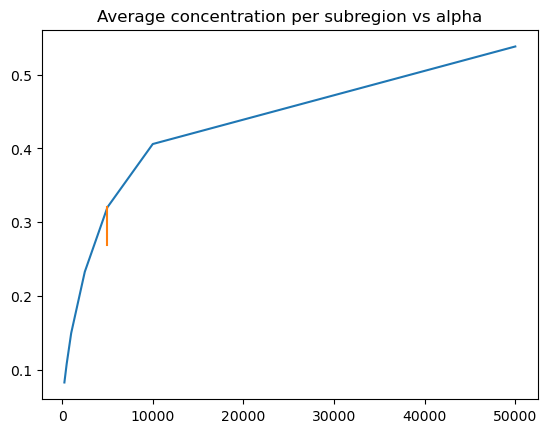

In [23]:
plt.plot(list(alphs.values()),meansc)
plt.title('Average concentration per subregion vs alpha')
plt.plot([5000,5000,5000,5000,5000,5000],meansc_month)

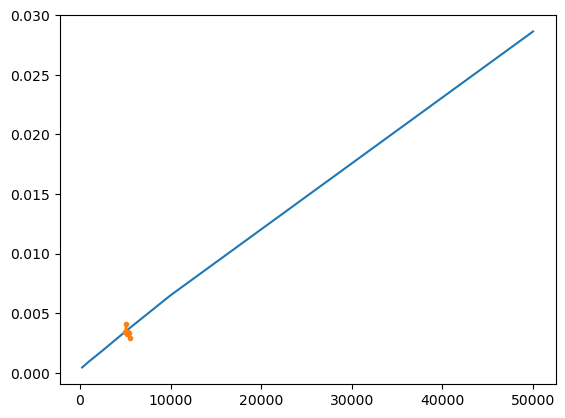

In [27]:
plt.plot(list(alphs.values()),np.array(meansc)/np.array(means))
plt.plot([5000,5100,5200,5300,5400,5500],np.array(meansc_month)/np.array(means_month),'.-')
